In [1]:
#install.packages('https://cran.r-project.org/src/contrib/Archive/urca//urca_1.2-8.tar.gz')
setwd('C:/Users/alica/OneDrive/Masaüstü/ali belgeler/BOUN/3.Sınıf/2.DÖNEM/IE 360/PROJECT')
#install.packages('https://cran.r-project.org/src/contrib/Archive/data.table/data.table_1.11.0.tar.gz')
library(data.table)
library(lubridate)
library(ggplot2)
#install.packages('https://cran.r-project.org/src/contrib/Archive/zoo/zoo_1.7-14.tar.gz')
library(zoo)
library(forecast)
#install.packages('corrplot')
library(corrplot)
library(urca)

Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
corrplot 0.92 loaded
Warning message:
"package 'urca' was b

In [251]:
weather = read.csv('2022-06-02_weather.csv')
weather$date = ymd(weather$date)
str(weather)
head(weather)
tail(weather)

'data.frame':	425088 obs. of  6 variables:
 $ date    : Date, format: "2021-02-01" "2021-02-01" ...
 $ hour    : int  0 1 2 3 4 5 6 7 8 9 ...
 $ lat     : num  36.2 36.2 36.2 36.2 36.2 ...
 $ lon     : num  33 33 33 33 33 33 33 33 33 33 ...
 $ variable: Factor w/ 4 levels "CLOUD_LOW_LAYER",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ value   : num  0 0 0 0 0 0 0 0 0 3 ...


date,hour,lat,lon,variable,value
2021-02-01,0,36.25,33,DSWRF,0
2021-02-01,1,36.25,33,DSWRF,0
2021-02-01,2,36.25,33,DSWRF,0
2021-02-01,3,36.25,33,DSWRF,0
2021-02-01,4,36.25,33,DSWRF,0
2021-02-01,5,36.25,33,DSWRF,0


,date,hour,lat,lon,variable,value
425083,2022-06-07,18,36.75,33.5,TEMP,NA
425084,2022-06-07,19,36.75,33.5,TEMP,NA
425085,2022-06-07,20,36.75,33.5,TEMP,NA
425086,2022-06-07,21,36.75,33.5,TEMP,NA
425087,2022-06-07,22,36.75,33.5,TEMP,NA
425088,2022-06-07,23,36.75,33.5,TEMP,NA


In [252]:
production = read.csv('selo.csv')
production$date = ymd(production$date)
new_prod = aggregate(production$production,by =list(date = production$date),FUN = sum)
new_prod$date = ymd(new_prod$date)
head(production)
tail(production)
head(new_prod)
tail(new_prod)
str(production)

date,hour,production
2021-02-01,0,0
2021-02-01,1,0
2021-02-01,2,0
2021-02-01,3,0
2021-02-01,4,0
2021-02-01,5,0


,date,hour,production
11635,2022-05-31,18,10.33
11636,2022-05-31,19,1.48
11637,2022-05-31,20,0.00
11638,2022-05-31,21,0.00
11639,2022-05-31,22,0.00
11640,2022-05-31,23,0.00


date,x
2021-02-01,21.669
2021-02-02,47.770
2021-02-03,27.290
2021-02-04,55.400
2021-02-05,61.336
2021-02-06,63.330


,date,x
480,2022-05-26,380.41
481,2022-05-27,319.53
482,2022-05-28,368.66
483,2022-05-29,373.31
484,2022-05-30,400.92
485,2022-05-31,416.37


'data.frame':	11640 obs. of  3 variables:
 $ date      : Date, format: "2021-02-01" "2021-02-01" ...
 $ hour      : int  0 1 2 3 4 5 6 7 8 9 ...
 $ production: num  0 0 0 0 0 0 0 0 0.189 1.35 ...


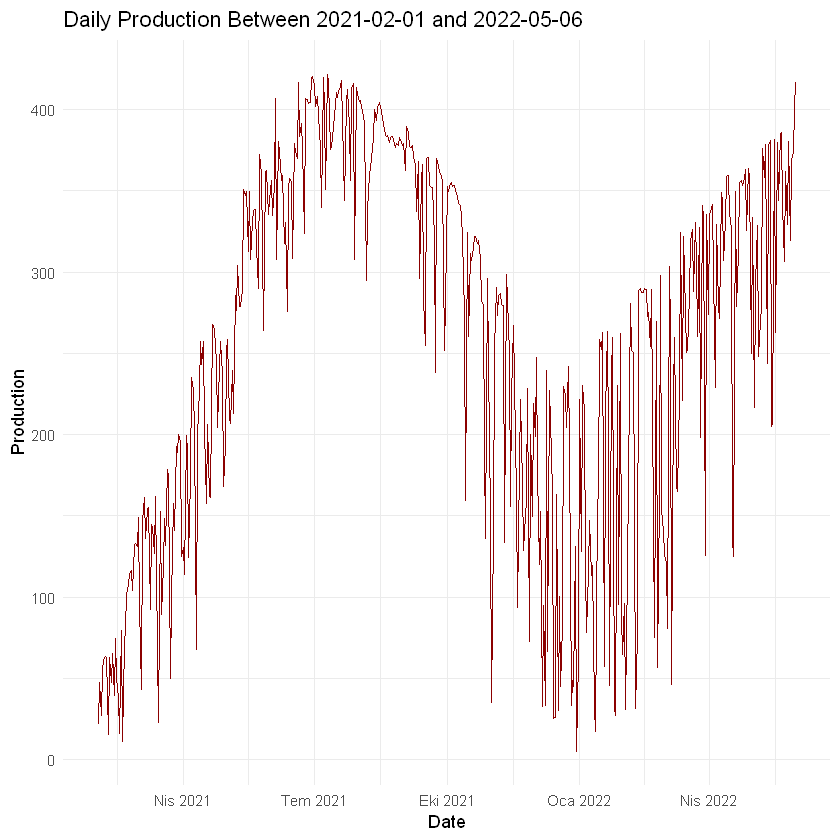

In [253]:
ggplot(new_prod,aes(x=date,y=x)) +geom_line(color = 'darkred') +theme_minimal() + labs(x = 'Date', y = 'Production',title = 'Daily Production Between 2021-02-01 and 2022-05-06')

In [254]:
kpss = ur.kpss(new_prod$x)
summary(kpss)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.9874 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [255]:
new_prod = data.table(new_prod)

In [256]:
new_prod[,differ:=x-shift(x,1)]
new_prod

date,x,differ
2021-02-01,21.66900,NA
2021-02-02,47.77000,26.10100
2021-02-03,27.29000,-20.48000
2021-02-04,55.40000,28.11000
2021-02-05,61.33600,5.93600
2021-02-06,63.33000,1.99400
2021-02-07,63.15000,-0.18000
2021-02-08,15.51000,-47.64000
2021-02-09,63.12000,47.61000
2021-02-10,47.28100,-15.83900


In [257]:
kpss = ur.kpss(new_prod$differ)
summary(kpss)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.0426 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


Warning message:
"Removed 1 row(s) containing missing values (geom_path)."

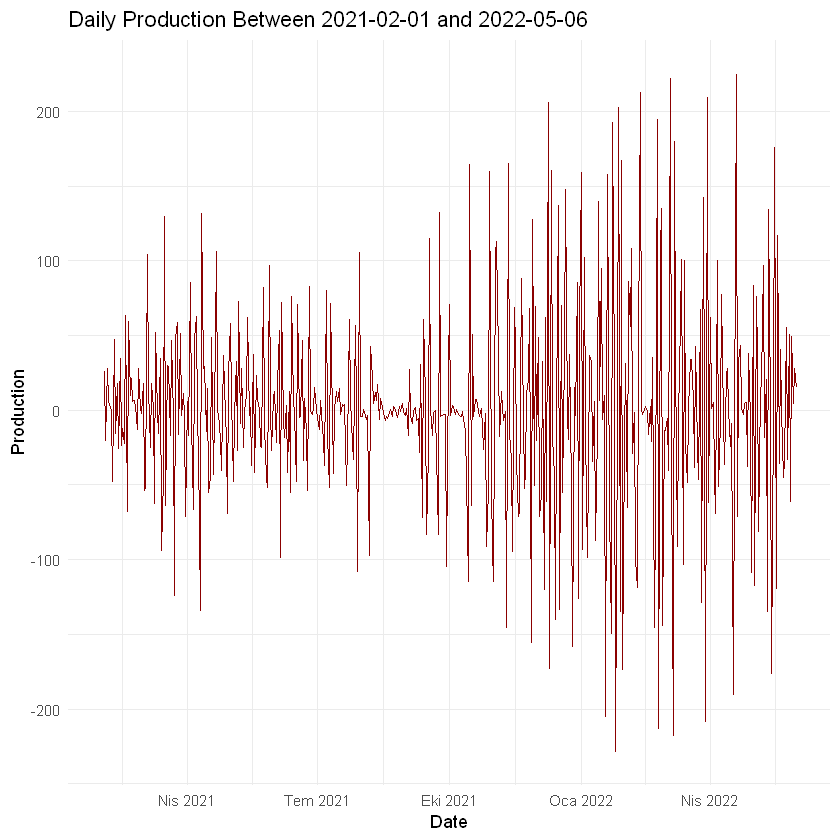

In [258]:
ggplot(new_prod,aes(x=date,y=differ)) +geom_line(color = 'darkred') +theme_minimal() + labs(x = 'Date', y = 'Production',title = 'Daily Production Between 2021-02-01 and 2022-05-06')

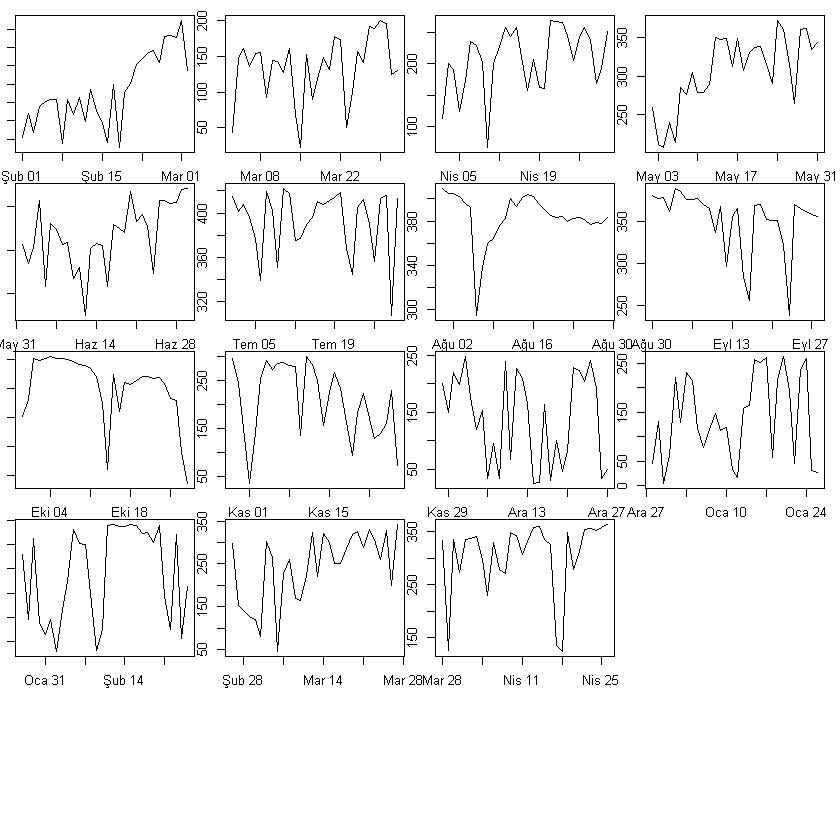

In [346]:
par(mar=c(1,1,1,1))
par(mfrow = c(5,4))
plot(new_prod$date[1:30],new_prod$x[1:30],type = 'l')
plot(new_prod$date[31:60],new_prod$x[31:60],type = 'l')
plot(new_prod$date[61:90],new_prod$x[61:90],type = 'l')
plot(new_prod$date[91:120],new_prod$x[91:120],type = 'l')
plot(new_prod$date[121:150],new_prod$x[121:150],type = 'l')
plot(new_prod$date[151:180],new_prod$x[151:180],type = 'l')
plot(new_prod$date[181:210],new_prod$x[181:210],type = 'l')
plot(new_prod$date[211:240],new_prod$x[211:240],type = 'l')
plot(new_prod$date[241:270],new_prod$x[241:270],type = 'l')
plot(new_prod$date[271:300],new_prod$x[271:300],type = 'l')
plot(new_prod$date[301:330],new_prod$x[301:330],type = 'l')
plot(new_prod$date[331:360],new_prod$x[331:360],type = 'l')
plot(new_prod$date[361:390],new_prod$x[361:390],type = 'l')
plot(new_prod$date[391:420],new_prod$x[391:420],type = 'l')
plot(new_prod$date[421:450],new_prod$x[421:450],type = 'l')

In [264]:
weather_wide = dcast(weather,date+hour ~ variable +lat + lon , value.var = 'value')
weather_wide$date = ymd(weather_wide$date)
weather_wide
str(weather_wide)



Warning message in dcast(weather, date + hour ~ variable + lat + lon, value.var = "value"):
"The dcast generic in data.table has been passed a data.frame and will attempt to redirect to the reshape2::dcast; please note that reshape2 is deprecated, and this redirection is now deprecated as well. Please do this redirection yourself like reshape2::dcast(weather). In the next version, this warning will become an error."

date,hour,CLOUD_LOW_LAYER_36.25_33,CLOUD_LOW_LAYER_36.25_33.25,CLOUD_LOW_LAYER_36.25_33.5,CLOUD_LOW_LAYER_36.5_33,CLOUD_LOW_LAYER_36.5_33.25,CLOUD_LOW_LAYER_36.5_33.5,CLOUD_LOW_LAYER_36.75_33,CLOUD_LOW_LAYER_36.75_33.25,...,REL_HUMIDITY_36.75_33.5,TEMP_36.25_33,TEMP_36.25_33.25,TEMP_36.25_33.5,TEMP_36.5_33,TEMP_36.5_33.25,TEMP_36.5_33.5,TEMP_36.75_33,TEMP_36.75_33.25,TEMP_36.75_33.5
2021-02-01,0,45,31,3,53,10,0,92,26,...,86.3,278.620,279.080,280.130,276.110,277.770,280.650,274.830,278.170,275.730
2021-02-01,1,44,26,19,64,21,0,93,31,...,84.5,277.950,278.950,281.050,276.130,277.640,280.380,274.710,278.250,275.540
2021-02-01,2,37,35,35,60,19,0,92,35,...,83.2,277.368,280.028,281.858,274.988,276.928,280.148,274.638,278.268,275.448
2021-02-01,3,43,45,46,51,24,8,91,36,...,82.8,278.405,280.555,281.695,274.565,277.075,280.405,274.535,278.015,275.685
2021-02-01,4,72,95,46,16,57,1,86,40,...,83.9,278.512,280.742,280.662,274.822,277.292,280.082,274.362,277.902,275.592
2021-02-01,5,69,95,31,24,68,2,86,56,...,85.0,278.064,280.494,280.294,275.064,277.504,279.474,274.064,278.194,275.714
2021-02-01,6,75,96,53,21,63,14,86,64,...,85.2,278.624,280.684,281.474,274.854,277.074,280.054,274.024,278.464,276.564
2021-02-01,7,79,97,65,16,72,36,87,69,...,84.6,278.692,280.732,281.522,274.532,278.342,281.502,274.262,278.482,277.002
2021-02-01,8,83,97,60,13,78,46,87,75,...,87.3,279.296,280.806,280.616,274.506,278.626,280.996,274.166,278.676,276.626
2021-02-01,9,86,97,67,20,78,43,87,78,...,84.9,280.070,281.090,281.930,277.250,279.430,282.220,274.580,279.150,277.820


'data.frame':	11808 obs. of  38 variables:
 $ date                       : Date, format: "2021-02-01" "2021-02-01" ...
 $ hour                       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ CLOUD_LOW_LAYER_36.25_33   : num  45 44 37 43 72 69 75 79 83 86 ...
 $ CLOUD_LOW_LAYER_36.25_33.25: num  31 26 35 45 95 95 96 97 97 97 ...
 $ CLOUD_LOW_LAYER_36.25_33.5 : num  3 19 35 46 46 31 53 65 60 67 ...
 $ CLOUD_LOW_LAYER_36.5_33    : num  53 64 60 51 16 24 21 16 13 20 ...
 $ CLOUD_LOW_LAYER_36.5_33.25 : num  10 21 19 24 57 68 63 72 78 78 ...
 $ CLOUD_LOW_LAYER_36.5_33.5  : num  0 0 0 8 1 2 14 36 46 43 ...
 $ CLOUD_LOW_LAYER_36.75_33   : num  92 93 92 91 86 86 86 87 87 87 ...
 $ CLOUD_LOW_LAYER_36.75_33.25: num  26 31 35 36 40 56 64 69 75 78 ...
 $ CLOUD_LOW_LAYER_36.75_33.5 : num  0 0 1 9 36 50 63 72 77 77 ...
 $ DSWRF_36.25_33             : num  0 0 0 0 0 0 0 0 0 3 ...
 $ DSWRF_36.25_33.25          : num  0 0 0 0 0 0 0 0 0 2 ...
 $ DSWRF_36.25_33.5           : num  0 0 0 0 0 0 0 0 0 3 ...
 $ DSWRF_

In [265]:
unq_dates_weather = unique(weather_wide$date)
unq_dates_prod = unique(new_prod$date)
remove = as.Date(intersect(unq_dates_weather,unq_dates_prod))

diff_dates= unq_dates_weather[! unq_dates_weather %in% remove]

diff_dates

[1] "2022-06-01" "2022-06-02" "2022-06-03" "2022-06-04" "2022-06-05"
[6] "2022-06-06" "2022-06-07"

In [266]:
index_list = c()
for(i in 1:length(diff_dates)){
    index_list = append(index_list,c(which(weather_wide$date == diff_dates[i]))) 
}

In [267]:
weather_wide = weather_wide[-index_list,]

In [268]:
weather_wide$production = production$production
weather_wide

date,hour,CLOUD_LOW_LAYER_36.25_33,CLOUD_LOW_LAYER_36.25_33.25,CLOUD_LOW_LAYER_36.25_33.5,CLOUD_LOW_LAYER_36.5_33,CLOUD_LOW_LAYER_36.5_33.25,CLOUD_LOW_LAYER_36.5_33.5,CLOUD_LOW_LAYER_36.75_33,CLOUD_LOW_LAYER_36.75_33.25,...,TEMP_36.25_33,TEMP_36.25_33.25,TEMP_36.25_33.5,TEMP_36.5_33,TEMP_36.5_33.25,TEMP_36.5_33.5,TEMP_36.75_33,TEMP_36.75_33.25,TEMP_36.75_33.5,production
2021-02-01,0,45,31,3,53,10,0,92,26,...,278.620,279.080,280.130,276.110,277.770,280.650,274.830,278.170,275.730,0.000
2021-02-01,1,44,26,19,64,21,0,93,31,...,277.950,278.950,281.050,276.130,277.640,280.380,274.710,278.250,275.540,0.000
2021-02-01,2,37,35,35,60,19,0,92,35,...,277.368,280.028,281.858,274.988,276.928,280.148,274.638,278.268,275.448,0.000
2021-02-01,3,43,45,46,51,24,8,91,36,...,278.405,280.555,281.695,274.565,277.075,280.405,274.535,278.015,275.685,0.000
2021-02-01,4,72,95,46,16,57,1,86,40,...,278.512,280.742,280.662,274.822,277.292,280.082,274.362,277.902,275.592,0.000
2021-02-01,5,69,95,31,24,68,2,86,56,...,278.064,280.494,280.294,275.064,277.504,279.474,274.064,278.194,275.714,0.000
2021-02-01,6,75,96,53,21,63,14,86,64,...,278.624,280.684,281.474,274.854,277.074,280.054,274.024,278.464,276.564,0.000
2021-02-01,7,79,97,65,16,72,36,87,69,...,278.692,280.732,281.522,274.532,278.342,281.502,274.262,278.482,277.002,0.000
2021-02-01,8,83,97,60,13,78,46,87,75,...,279.296,280.806,280.616,274.506,278.626,280.996,274.166,278.676,276.626,0.189
2021-02-01,9,86,97,67,20,78,43,87,78,...,280.070,281.090,281.930,277.250,279.430,282.220,274.580,279.150,277.820,1.350


In [269]:
weather_wide_adj = weather_wide[-c(which(month(weather_wide$date) > 3 & month(weather_wide$date) < 10 & weather_wide$hour < 6)),]
weather_wide_adj = weather_wide_adj[-c(which(month(weather_wide_adj$date) > 3 & month(weather_wide_adj$date) < 10 & weather_wide_adj$hour > 19)),]
weather_wide_adj = weather_wide_adj[-c(which(month(weather_wide_adj$date) < 4  & weather_wide_adj$hour > 17)),]
weather_wide_adj = weather_wide_adj[-c(which(month(weather_wide_adj$date) < 4  & weather_wide_adj$hour < 8)),]
weather_wide_adj = weather_wide_adj[-c(which(month(weather_wide_adj$date) > 9  & weather_wide_adj$hour > 17)),]
weather_wide_adj = weather_wide_adj[-c(which(month(weather_wide_adj$date) > 9  & weather_wide_adj$hour <8)),]



weather_wide_adj


,date,hour,CLOUD_LOW_LAYER_36.25_33,CLOUD_LOW_LAYER_36.25_33.25,CLOUD_LOW_LAYER_36.25_33.5,CLOUD_LOW_LAYER_36.5_33,CLOUD_LOW_LAYER_36.5_33.25,CLOUD_LOW_LAYER_36.5_33.5,CLOUD_LOW_LAYER_36.75_33,CLOUD_LOW_LAYER_36.75_33.25,...,TEMP_36.25_33,TEMP_36.25_33.25,TEMP_36.25_33.5,TEMP_36.5_33,TEMP_36.5_33.25,TEMP_36.5_33.5,TEMP_36.75_33,TEMP_36.75_33.25,TEMP_36.75_33.5,production
9,2021-02-01,8,83,97,60,13,78,46,87,75,...,279.296,280.806,280.616,274.506,278.626,280.996,274.166,278.676,276.626,0.189
10,2021-02-01,9,86,97,67,20,78,43,87,78,...,280.070,281.090,281.930,277.250,279.430,282.220,274.580,279.150,277.820,1.350
11,2021-02-01,10,100,100,60,79,95,7,82,68,...,280.478,281.468,283.518,278.748,280.378,284.028,275.548,280.148,279.178,1.730
12,2021-02-01,11,100,100,59,71,96,8,84,75,...,280.869,281.759,284.099,279.799,281.239,285.209,275.989,280.929,279.799,2.730
13,2021-02-01,12,98,100,71,65,98,10,86,78,...,281.540,281.900,284.090,280.340,281.850,285.850,276.440,281.210,280.280,1.950
14,2021-02-01,13,97,100,69,73,98,11,88,82,...,281.768,282.078,284.658,280.298,281.858,286.528,276.698,281.408,280.538,1.350
15,2021-02-01,14,97,100,67,73,94,14,90,83,...,281.732,282.622,284.752,280.432,282.812,286.952,276.572,282.062,281.192,2.040
16,2021-02-01,15,93,98,71,77,91,23,90,85,...,282.443,283.023,284.253,280.143,283.163,286.653,276.603,282.503,281.353,3.150
17,2021-02-01,16,82,46,6,90,84,56,100,91,...,282.509,283.229,284.619,279.719,282.909,286.089,276.509,282.479,281.089,5.830
18,2021-02-01,17,58,33,3,94,65,28,100,65,...,282.232,283.022,284.242,279.332,282.682,285.672,276.222,282.182,280.602,1.350


In [270]:
mean_rel = NULL
mean_temp = NULL
mean_cloud_low = NULL
mean_DSWR = NULL
for(i in 1:length(weather_wide_adj$date)){
    mean_DSWR[i] = weighted.mean(weather_wide_adj[i,12:20],rep(1/9,9))
    mean_cloud_low[i] = weighted.mean(weather_wide_adj[i,3:11],rep(1/9,9))
    mean_temp[i] = weighted.mean(weather_wide_adj[i,30:38],rep(1/9,9))
    mean_rel[i] = weighted.mean(weather_wide_adj[i,21:29],rep(1/9,9))
    
}

In [271]:
model_data = data.frame('date' = weather_wide_adj$date, 'hour' = weather_wide_adj$hour, mean_cloud_low,mean_DSWR,mean_rel,mean_temp,'production'=weather_wide_adj$production)

model_data

date,hour,mean_cloud_low,mean_DSWR,mean_rel,mean_temp,production
2021-02-01,8,68.4444444,0.000000,86.85556,278.2571,0.189
2021-02-01,9,70.3333333,6.444444,85.97778,279.2822,1.350
2021-02-01,10,67.3333333,147.777778,81.52222,280.3880,1.730
2021-02-01,11,68.6666667,203.333333,79.65556,281.0768,2.730
2021-02-01,12,71.1111111,243.333333,78.55556,281.5000,1.950
2021-02-01,13,74.0000000,262.222222,77.53333,281.7591,1.350
2021-02-01,14,74.7777778,287.777778,74.94444,282.1253,2.040
2021-02-01,15,76.6666667,296.666667,72.57778,282.2374,3.150
2021-02-01,16,72.7777778,264.444444,72.85556,282.1279,5.830
2021-02-01,17,59.7777778,233.333333,73.53333,281.7987,1.350


In [272]:
model_data = data.table(model_data)
model_data[,differ:= production-shift(production,1)]

In [273]:
kpss = ur.kpss(model_data$differ)
summary(kpss)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 11 lags. 

Value of test-statistic is: 0.0058 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [275]:
model_data$which_month = as.factor(month(model_data$date))

model_data$hour = as.factor(model_data$hour)
model_data$trend = ma(model_data$production,2)

str(model_data)

Classes 'data.table' and 'data.frame':	5826 obs. of  10 variables:
 $ date          : Date, format: "2021-02-01" "2021-02-01" ...
 $ hour          : Factor w/ 14 levels "6","7","8","9",..: 3 4 5 6 7 8 9 10 11 12 ...
 $ mean_cloud_low: num  68.4 70.3 67.3 68.7 71.1 ...
 $ mean_DSWR     : num  0 6.44 147.78 203.33 243.33 ...
 $ mean_rel      : num  86.9 86 81.5 79.7 78.6 ...
 $ mean_temp     : num  278 279 280 281 282 ...
 $ production    : num  0.189 1.35 1.73 2.73 1.95 1.35 2.04 3.15 5.83 1.35 ...
 $ differ        : num  NA 1.16 0.38 1 -0.78 ...
 $ which_month   : Factor w/ 12 levels "1","2","3","4",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ trend         : Time-Series  from 1 to 5826: NA 1.15 1.88 2.29 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 



Call:
lm(formula = differ ~ . - date - production, data = model_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-31.5881  -2.4579   0.1185   2.4163  26.2553 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.6453465  5.5568073   0.116 0.907549    
hour7          10.6289985  0.4765889  22.302  < 2e-16 ***
hour8           6.5106788  0.4781888  13.615  < 2e-16 ***
hour9           1.5755641  0.5214005   3.022 0.002524 ** 
hour10          0.6749493  0.6886296   0.980 0.327061    
hour11         -0.0685472  0.7351486  -0.093 0.925714    
hour12          0.2161374  0.7730623   0.280 0.779805    
hour13          0.4264629  0.7993096   0.534 0.593681    
hour14         -0.0050545  0.8106024  -0.006 0.995025    
hour15         -0.3102947  0.8057898  -0.385 0.700191    
hour16         -3.1686518  0.7276549  -4.355 1.36e-05 ***
hour17         -7.3889535  0.6657266 -11.099  < 2e-16 ***
hour18         -8.6644440  0.6435607 -13.463  < 2e-16 **


	Breusch-Godfrey test for serial correlation of order up to 33

data:  Residuals
LM test = 1105.5, df = 33, p-value < 2.2e-16


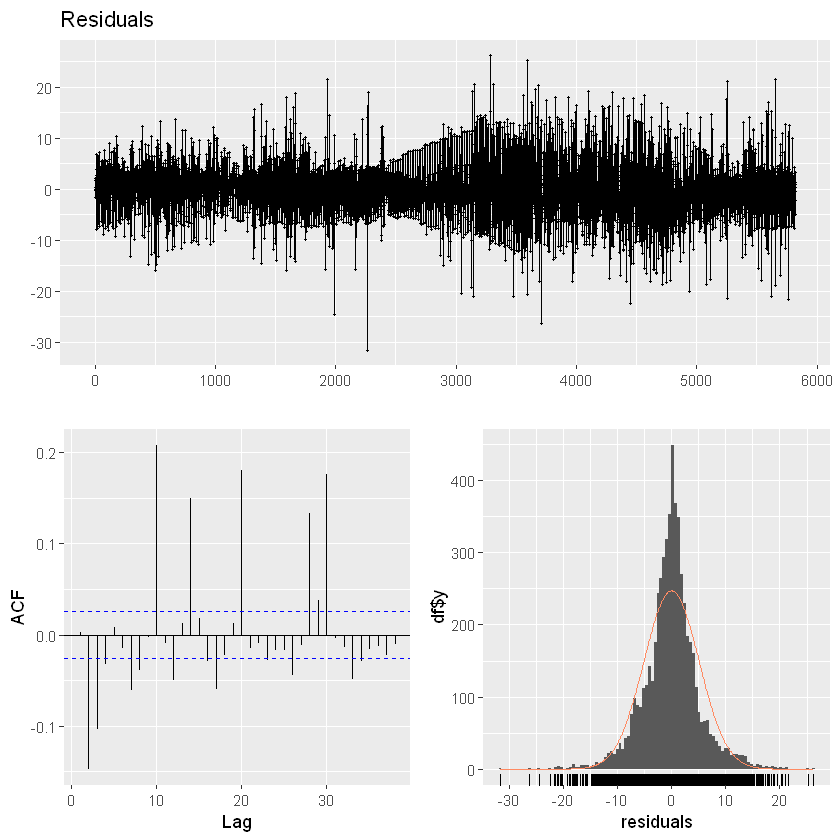

In [276]:
model = lm(differ~.-date-production,model_data)
summary(model)
checkresiduals(model)

In [277]:
model_data$lag_1 = c(NaN,model_data$differ[1:(length(model_data$date)-1)])
model_data

date,hour,mean_cloud_low,mean_DSWR,mean_rel,mean_temp,production,differ,which_month,trend,lag_1
2021-02-01,8,68.4444444,0.000000,86.85556,278.2571,0.189,NA,2,NA,NaN
2021-02-01,9,70.3333333,6.444444,85.97778,279.2822,1.350,1.161,2,1.15475,NA
2021-02-01,10,67.3333333,147.777778,81.52222,280.3880,1.730,0.380,2,1.88500,1.161
2021-02-01,11,68.6666667,203.333333,79.65556,281.0768,2.730,1.000,2,2.28500,0.380
2021-02-01,12,71.1111111,243.333333,78.55556,281.5000,1.950,-0.780,2,1.99500,1.000
2021-02-01,13,74.0000000,262.222222,77.53333,281.7591,1.350,-0.600,2,1.67250,-0.780
2021-02-01,14,74.7777778,287.777778,74.94444,282.1253,2.040,0.690,2,2.14500,-0.600
2021-02-01,15,76.6666667,296.666667,72.57778,282.2374,3.150,1.110,2,3.54250,0.690
2021-02-01,16,72.7777778,264.444444,72.85556,282.1279,5.830,2.680,2,4.04000,1.110
2021-02-01,17,59.7777778,233.333333,73.53333,281.7987,1.350,-4.480,2,2.42250,2.680



Call:
lm(formula = differ ~ . - date - production, data = model_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-31.5259  -2.4677   0.1149   2.4294  26.2714 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.4579840  5.5682791   0.082 0.934452    
hour7          10.6500263  0.4785742  22.254  < 2e-16 ***
hour8           6.5496469  0.4853676  13.494  < 2e-16 ***
hour9           1.6539281  0.5448134   3.036 0.002410 ** 
hour10          0.7750294  0.7219510   1.074 0.283082    
hour11          0.0150994  0.7580211   0.020 0.984108    
hour12          0.2995941  0.7950945   0.377 0.706334    
hour13          0.5147084  0.8231700   0.625 0.531815    
hour14          0.0866993  0.8360270   0.104 0.917408    
hour15         -0.2185020  0.8314674  -0.263 0.792721    
hour16         -3.0881742  0.7496262  -4.120 3.85e-05 ***
hour17         -7.3218639  0.6827968 -10.723  < 2e-16 ***
hour18         -8.6269190  0.6498528 -13.275  < 2e-16 **


	Breusch-Godfrey test for serial correlation of order up to 34

data:  Residuals
LM test = 1114.9, df = 34, p-value < 2.2e-16


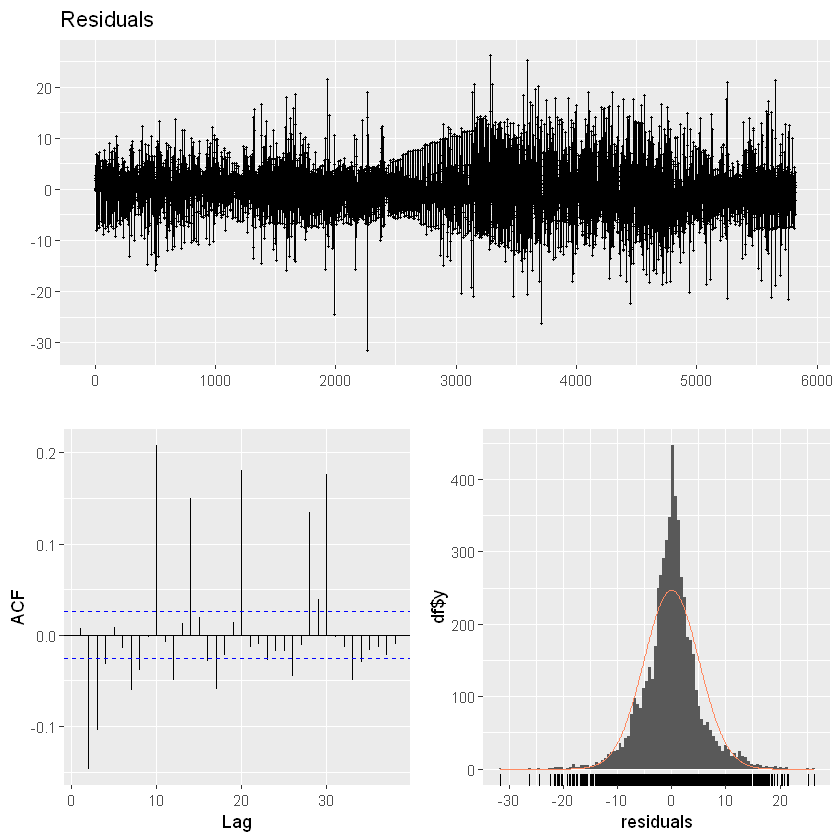

In [278]:
model = lm(differ~.-date-production,model_data)
summary(model)
checkresiduals(model)

In [279]:
model_data$residuals = c(rep(NaN,2),model$residuals,NaN)
model_data$up_quan = rep(0,length(model_data$differ))
model_data$down_quan = rep(0,length(model_data$differ))
model_data[which(model_data$residual > quantile(model$residual,0.95)),length(model_data)-1] = 1
model_data[which(model_data$residual < quantile(model$residual,0.05)),length(model_data)] = 1
model_data


date,hour,mean_cloud_low,mean_DSWR,mean_rel,mean_temp,production,differ,which_month,trend,lag_1,residuals,up_quan,down_quan
2021-02-01,8,68.4444444,0.000000,86.85556,278.2571,0.189,NA,2,NA,NaN,NaN,0,0
2021-02-01,9,70.3333333,6.444444,85.97778,279.2822,1.350,1.161,2,1.15475,NA,NaN,0,0
2021-02-01,10,67.3333333,147.777778,81.52222,280.3880,1.730,0.380,2,1.88500,1.161,-0.19565451,0,0
2021-02-01,11,68.6666667,203.333333,79.65556,281.0768,2.730,1.000,2,2.28500,0.380,1.66422191,0,0
2021-02-01,12,71.1111111,243.333333,78.55556,281.5000,1.950,-0.780,2,1.99500,1.000,0.05734556,0,0
2021-02-01,13,74.0000000,262.222222,77.53333,281.7591,1.350,-0.600,2,1.67250,-0.780,0.27039414,0,0
2021-02-01,14,74.7777778,287.777778,74.94444,282.1253,2.040,0.690,2,2.14500,-0.600,2.18491069,0,0
2021-02-01,15,76.6666667,296.666667,72.57778,282.2374,3.150,1.110,2,3.54250,0.690,2.78316174,0,0
2021-02-01,16,72.7777778,264.444444,72.85556,282.1279,5.830,2.680,2,4.04000,1.110,6.81844186,0,0
2021-02-01,17,59.7777778,233.333333,73.53333,281.7987,1.350,-4.480,2,2.42250,2.680,3.87034115,0,0



Call:
lm(formula = differ ~ . - date - residuals - production, data = model_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.1221  -1.8819   0.1357   1.8871  13.1970 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -5.388e-01  3.616e+00  -0.149 0.881552    
hour7           1.169e+01  3.112e-01  37.578  < 2e-16 ***
hour8           5.931e+00  3.178e-01  18.664  < 2e-16 ***
hour9          -9.758e-02  3.564e-01  -0.274 0.784243    
hour10          4.663e-01  4.688e-01   0.995 0.319979    
hour11          3.033e-01  4.923e-01   0.616 0.537866    
hour12          8.251e-01  5.161e-01   1.599 0.109951    
hour13          7.599e-01  5.344e-01   1.422 0.155044    
hour14          6.984e-01  5.429e-01   1.287 0.198307    
hour15          2.572e-01  5.399e-01   0.476 0.633869    
hour16         -1.939e+00  4.883e-01  -3.971 7.23e-05 ***
hour17         -7.186e+00  4.440e-01 -16.185  < 2e-16 ***
hour18         -9.801e+00  4.220e-01 -23.224


	Breusch-Godfrey test for serial correlation of order up to 36

data:  Residuals
LM test = 686.85, df = 36, p-value < 2.2e-16


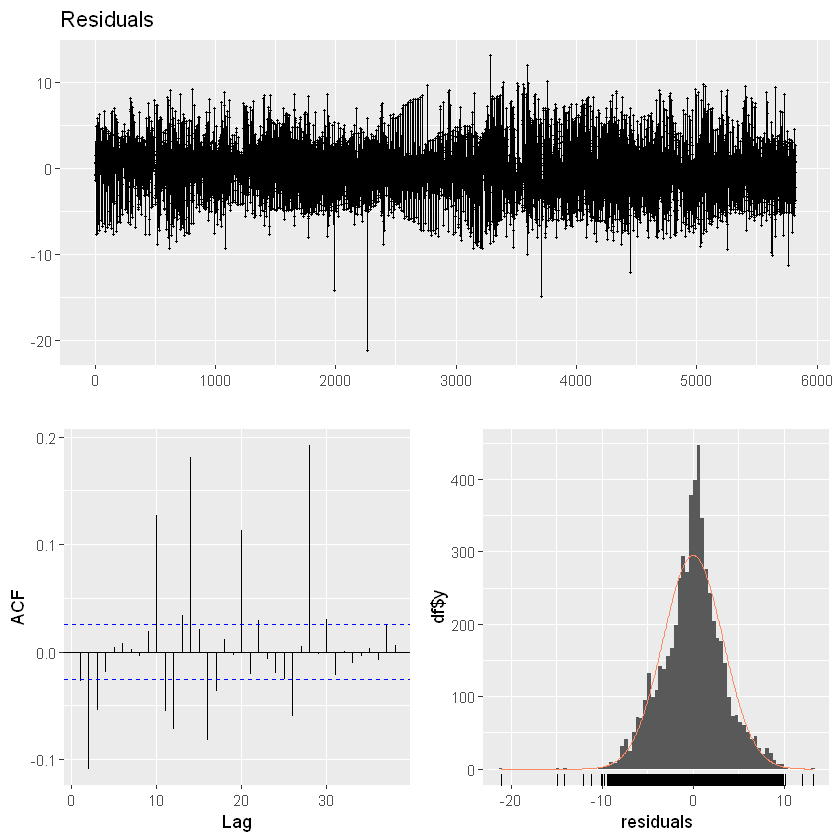

In [280]:
model = lm(differ~.-date-residuals-production,model_data)
summary(model)
checkresiduals(model)

In [281]:
model_data$lag_2 = c(rep(NaN,2),model_data$differ[1:(length(model_data$date)-2)])
model_data$lag_3 = c(rep(NaN,3),model_data$differ[1:(length(model_data$date)-3)])
model_data$lag_4 = c(rep(NaN,4),model_data$differ[1:(length(model_data$date)-4)])
model_data$lag_5 = c(rep(NaN,5),model_data$differ[1:(length(model_data$date)-5)])
model_data$lag_6 = c(rep(NaN,6),model_data$differ[1:(length(model_data$date)-6)])
model_data$lag_7 = c(rep(NaN,7),model_data$differ[1:(length(model_data$date)-7)])
model_data$lag_8 = c(rep(NaN,8),model_data$differ[1:(length(model_data$date)-8)])
model_data$lag_9 = c(rep(NaN,9),model_data$differ[1:(length(model_data$date)-9)])
model_data$lag_10 = c(rep(NaN,10),model_data$differ[1:(length(model_data$date)-10)])
model_data$lag_11 = c(rep(NaN,11),model_data$differ[1:(length(model_data$date)-11)])
model_data$lag_12 = c(rep(NaN,12),model_data$differ[1:(length(model_data$date)-12)])
model_data$lag_13 = c(rep(NaN,13),model_data$differ[1:(length(model_data$date)-13)])
model_data$lag_14 = c(rep(NaN,14),model_data$differ[1:(length(model_data$date)-14)])





Call:
lm(formula = differ ~ . - date - residuals - production, data = model_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.7135  -1.6611   0.0605   1.6949  11.7436 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.026e+01  3.271e+00  -3.137 0.001716 ** 
hour7           9.593e+00  3.123e-01  30.714  < 2e-16 ***
hour8           6.966e+00  3.622e-01  19.234  < 2e-16 ***
hour9           3.379e+00  4.124e-01   8.193 3.11e-16 ***
hour10          6.224e+00  5.067e-01  12.283  < 2e-16 ***
hour11          6.560e+00  5.110e-01  12.838  < 2e-16 ***
hour12          6.371e+00  5.179e-01  12.300  < 2e-16 ***
hour13          5.744e+00  5.336e-01  10.764  < 2e-16 ***
hour14          5.397e+00  5.418e-01   9.961  < 2e-16 ***
hour15          4.780e+00  5.444e-01   8.782  < 2e-16 ***
hour16          2.749e+00  5.072e-01   5.420 6.19e-08 ***
hour17         -2.282e+00  4.649e-01  -4.909 9.41e-07 ***
hour18         -4.440e+00  4.371e-01 -10.159


	Breusch-Godfrey test for serial correlation of order up to 49

data:  Residuals
LM test = 1209.6, df = 49, p-value < 2.2e-16


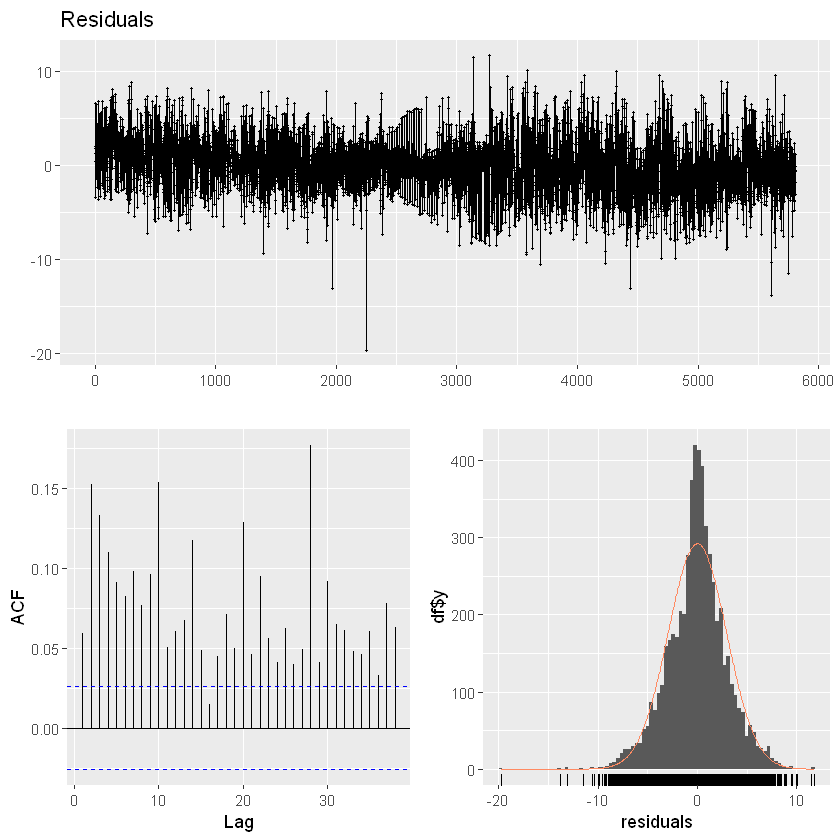

In [282]:
model = lm(differ~.-date-residuals-production,model_data)
summary(model)
checkresiduals(model)


Call:
lm(formula = differ ~ . - date - residuals - production - mean_temp, 
    data = model_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.7326  -1.6705   0.0662   1.6985  11.7500 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -8.153e+00  5.255e-01 -15.514  < 2e-16 ***
hour7           9.609e+00  3.113e-01  30.869  < 2e-16 ***
hour8           6.997e+00  3.590e-01  19.492  < 2e-16 ***
hour9           3.419e+00  4.076e-01   8.389  < 2e-16 ***
hour10          6.279e+00  4.996e-01  12.566  < 2e-16 ***
hour11          6.624e+00  5.014e-01  13.211  < 2e-16 ***
hour12          6.442e+00  5.061e-01  12.729  < 2e-16 ***
hour13          5.820e+00  5.207e-01  11.176  < 2e-16 ***
hour14          5.474e+00  5.287e-01  10.354  < 2e-16 ***
hour15          4.857e+00  5.317e-01   9.134  < 2e-16 ***
hour16          2.820e+00  4.956e-01   5.690 1.34e-08 ***
hour17         -2.220e+00  4.551e-01  -4.879 1.10e-06 ***
hour18         -4.388e+00  


	Breusch-Godfrey test for serial correlation of order up to 48

data:  Residuals
LM test = 1206.5, df = 48, p-value < 2.2e-16


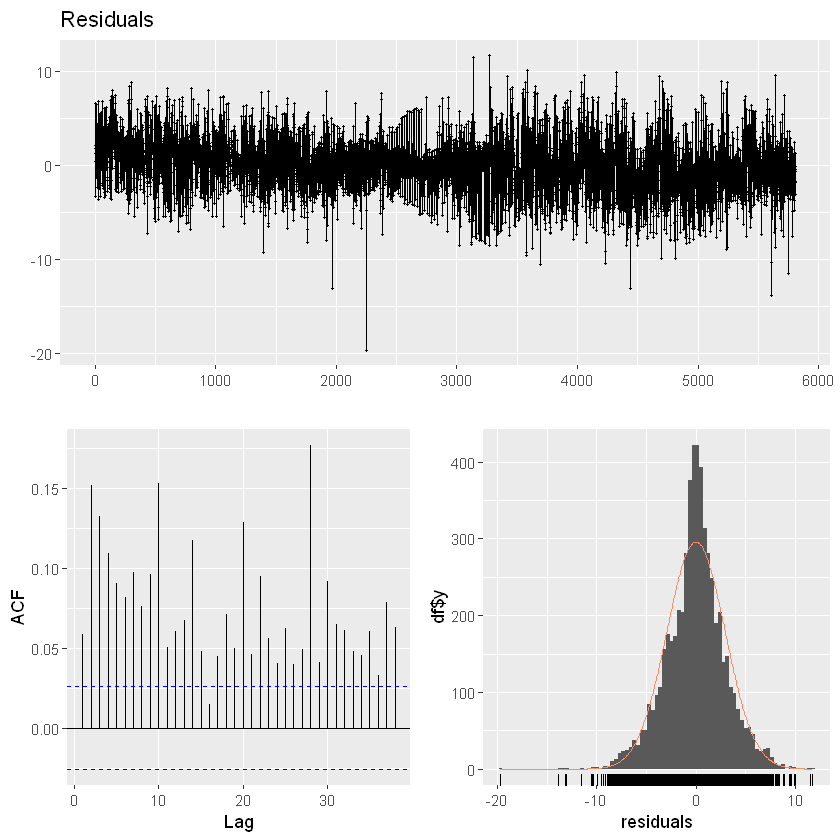

In [283]:
model = lm(differ~.-date-residuals-production-mean_temp,model_data)
summary(model)
checkresiduals(model)

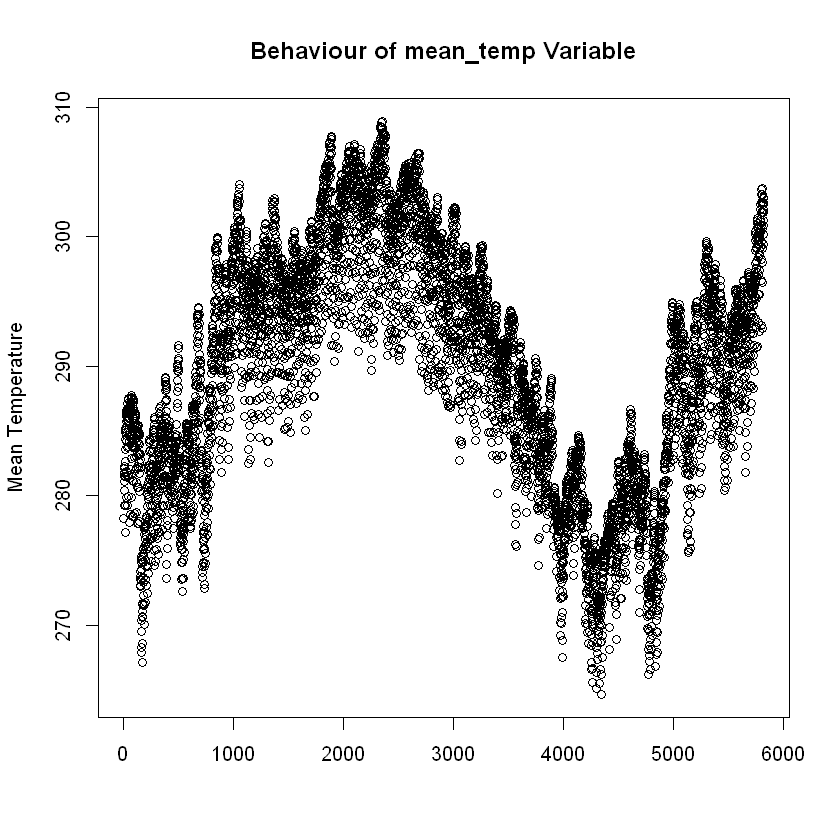

In [344]:
plot(1:length(model_data$mean_temp),model_data$mean_temp,xlab ='',ylab ='Mean Temperature',main = 'Behaviour of mean_temp Variable')

In [320]:
new_temp = aggregate(model_data$mean_temp,by =list(date =month(model_data$date) ),FUN = mean)
new_temp
new_prod_hour = aggregate(model_data$production,by =list(date = month(model_data$date)),FUN = mean)
new_prod_hour
                          

date,x
1,276.0752
2,279.9885
3,279.9339
4,289.3163
5,294.0640
6,296.3712
7,301.2274
8,301.0094
9,295.5934
10,291.9563


date,x
1,15.17230
2,13.38694
3,18.71885
4,18.45971
5,22.64356
6,26.18121
7,28.06392
8,27.32654
9,24.64711
10,29.31887


In [352]:
model_data_tr = model_data

In [353]:
model_data_tr$mean_temp[which(model_data_tr$mean_temp <= 280)] = 1
model_data_tr$mean_temp[which(model_data_tr$mean_temp > 280)] = 0

model_data_tr$mean_temp = as.factor(model_data_tr$mean_temp)


Call:
lm(formula = differ ~ . - date - residuals - production, data = model_data_tr)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.6419  -1.6674   0.0586   1.6742  11.8010 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -7.740e+00  5.352e-01 -14.463  < 2e-16 ***
hour7           9.580e+00  3.110e-01  30.805  < 2e-16 ***
hour8           6.958e+00  3.586e-01  19.399  < 2e-16 ***
hour9           3.317e+00  4.079e-01   8.131 5.18e-16 ***
hour10          6.073e+00  5.017e-01  12.105  < 2e-16 ***
hour11          6.375e+00  5.048e-01  12.630  < 2e-16 ***
hour12          6.163e+00  5.104e-01  12.075  < 2e-16 ***
hour13          5.517e+00  5.257e-01  10.494  < 2e-16 ***
hour14          5.150e+00  5.344e-01   9.638  < 2e-16 ***
hour15          4.531e+00  5.374e-01   8.430  < 2e-16 ***
hour16          2.516e+00  5.009e-01   5.024 5.22e-07 ***
hour17         -2.475e+00  4.591e-01  -5.391 7.27e-08 ***
hour18         -4.561e+00  4.313e-01 -10.


	Breusch-Godfrey test for serial correlation of order up to 49

data:  Residuals
LM test = 1207.5, df = 49, p-value < 2.2e-16


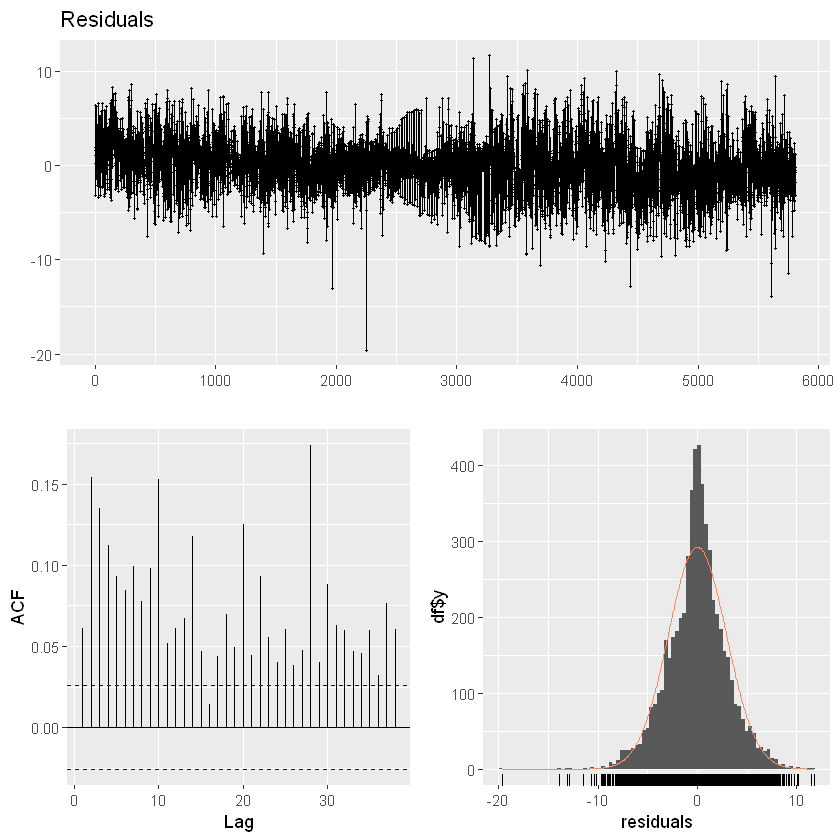

In [354]:
model = lm(differ~.-date-residuals-production,model_data_tr)
summary(model)
checkresiduals(model)

In [355]:
predicted = predict(model,model_data_tr)

In [356]:
model_data_tr$predicted = predicted
model_data_tr

date,hour,mean_cloud_low,mean_DSWR,mean_rel,mean_temp,production,differ,which_month,trend,...,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,predicted
2021-02-01,8,68.4444444,0.000000,86.85556,1,0.189,NA,2,NA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA
2021-02-01,9,70.3333333,6.444444,85.97778,1,1.350,1.161,2,1.15475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA
2021-02-01,10,67.3333333,147.777778,81.52222,0,1.730,0.380,2,1.88500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA
2021-02-01,11,68.6666667,203.333333,79.65556,0,2.730,1.000,2,2.28500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA
2021-02-01,12,71.1111111,243.333333,78.55556,0,1.950,-0.780,2,1.99500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA
2021-02-01,13,74.0000000,262.222222,77.53333,0,1.350,-0.600,2,1.67250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA
2021-02-01,14,74.7777778,287.777778,74.94444,0,2.040,0.690,2,2.14500,...,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA
2021-02-01,15,76.6666667,296.666667,72.57778,0,3.150,1.110,2,3.54250,...,1.161,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA
2021-02-01,16,72.7777778,264.444444,72.85556,0,5.830,2.680,2,4.04000,...,0.380,1.161,NA,NaN,NaN,NaN,NaN,NaN,NaN,NA
2021-02-01,17,59.7777778,233.333333,73.53333,0,1.350,-4.480,2,2.42250,...,1.000,0.380,1.161,NA,NaN,NaN,NaN,NaN,NaN,NA


In [357]:
model_data_tr$predicted_prod = c(rep(NaN,15),(model_data_tr$production[15:(length(model_data_tr$production)-2)] + model_data_tr$predicted[16:(length(model_data_tr$predicted)-1)]),NaN)

In [359]:
tail(model_data_tr)

date,hour,mean_cloud_low,mean_DSWR,mean_rel,mean_temp,production,differ,which_month,trend,...,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,predicted,predicted_prod
2022-05-31,14,0,911.1267,19.70000,0,37.86,-0.10,5,37.9025,...,18.67,6.93,-10.01,-14.93,-12.28,-0.70,-0.03,0.09,0.365774,38.32577
2022-05-31,15,0,912.9102,19.24444,0,37.93,0.07,5,37.8400,...,13.40,18.67,6.93,-10.01,-14.93,-12.28,-0.70,-0.03,0.183444,38.04344
2022-05-31,16,0,795.4778,18.81111,0,37.64,-0.29,5,34.9950,...,0.27,13.40,18.67,6.93,-10.01,-14.93,-12.28,-0.70,-1.505211,36.42479
2022-05-31,17,0,710.4156,19.23333,0,26.77,-10.87,5,25.3775,...,-0.43,0.27,13.40,18.67,6.93,-10.01,-14.93,-12.28,-9.070854,28.56915
2022-05-31,18,0,615.6200,20.63333,0,10.33,-16.44,5,12.2275,...,-0.26,-0.43,0.27,13.40,18.67,6.93,-10.01,-14.93,-13.347742,13.42226
2022-05-31,19,0,516.1711,25.33333,0,1.48,-8.85,5,NA,...,-0.62,-0.26,-0.43,0.27,13.40,18.67,6.93,-10.01,NA,NaN
